# Úkol č. 2 - Využití neuronových sítí

  * **Deadline je 13. 5. 2024, 23:59:59**, pokud odevzdáte úkol do 20. 5. 2024, 23:59:59, budete penalizování -12 body, pozdější odevzdání je bez bodu.
  * V rámci tohoto úkolu musíte sestrojit vhodný model neuronové sítě pro vícetřídou klasifikaci.
  * Část bodů získáte za správné vypracování a část bodů získáte za výslednou přesnost Vašeho modelu na evaluačních datech.
    
> **Úkoly jsou zadány tak, aby Vám daly prostor pro invenci. Vymyslet _jak přesně_ budete úkol řešit, je důležitou součástí zadání a originalita či nápaditost bude také hodnocena!**

Využívejte buňky typu `Markdown` k vysvětlování Vašeho postupu. Za nepřehlednost budou strhávány body.

## Zdroj dat

 * Zdrojem dat jsou soubory `train.csv` a `evaluate.csv`.
 * Jedná se o obrázky 32x32 pixelů ve stupních šedi, které byly nějakým způsobem vyrobeny z [Fashion Mnist datasetu](https://www.kaggle.com/datasets/zalando-research/fashionmnist).
 * Soubor `train.csv` obsahuje trénovací data.
 * Cílová (vysvětlovaná) proměnná se jmenuje **label**.
 * Soubor `evaluate.csv` obsahuje testovací data bez hodnot skutečných labelů.

## Pokyny k vypracování (max 18 bodů)

**Body zadání**, za jejichž (poctivé) vypracování získáte **18 bodů**:
  * V notebooku načtěte data ze souboru `train.csv`. Vhodným způsobem si je rozdělte na podmnožiny, které Vám poslouží pro trénování, porovnávání modelů a následnou predikci výkonnosti finálního modelu.
  * Proveďte základní průzkum dat a svá pozorování diskutujte. Některé obrázky také zobrazte.
  * Sestrojte a natrénujte několik variant modelu dopředné neuronové sítě. Přitom v rámci výpočetních možností:
      * Okomentujte vhodnost daného modelu pro daný typ úlohy.
      * Experimentujte s různými hloubkami a velikosmi vrstev.
      * Experimentujte se standardizací/normalizací dat.
      * Experimentujte s různými optimalizačními metodami.
      * Experimentujte s různými regularizačními technikami.
      * Získané výsledky vždy řádně okomentujte.

  * Sestrojte model konvoluční neuronové sítě. Přitom v rámci výpočetních možností:
      * Okomentujte vhodnost daného modelu pro daný typ úlohy.
      * Experimentujte s různými hloubkami a velikosmi vrstev.
      * Experimentujte se standardizací/normalizací dat.
      * Experimentujte s různými optimalizačními metodami.
      * Experimentujte s různými regularizačními technikami.
      * Získané výsledky vždy řádně okomentujte.
    
  * Ze všech zkoušených možností vyberte finální model a odhadněte, jakou přesnost můžete očekávat na nových datech, která jste doposud neměli k dispozici.
  
  * Nakonec načtěte vyhodnocovací data ze souboru`evaluate.csv`. Pomocí finálního modelu napočítejte predikce pro tyto data (vysvětlovaná proměnná v nich již není). Vytvořte soubor `results.csv`, ve kterém získané predikce uložíte do sloupce **label** a identifikátory do sloupce **ID**. Tento soubor též odevzdejte (uložte do projektu vedle notebooku).
   
   * Ukázka prvních řádků souboru `results.csv`:
  
```
ID,label
0,0
1,1
...
```

## Vyhodnocovací část (max 7 bodů)
Za přesnost (accuraccy) na odevzdaných predikcích pro vyhodnocovací množnu získáte dalších max **7 bodů**.

Označíme-li $A$ přesnost, které jste dosáhli, zaokrouhlenou na 2 desetinná místa, akumulují se výsledné body podle následujících pravidel:
* pokud $A \geq 0.80$ obdržíte +1 bod
* pokud $A \geq 0.83$ obdržíte +1 bod
* pokud $A \geq 0.86$ obdržíte +1 bod
* pokud $A \geq 0.87$ obdržíte +1 bod
* pokud $A \geq 0.88$ obdržíte +1 bod
* pokud $A \geq 0.89$ obdržíte +1 bod
* pokud $A \geq 0.90$ obdržíte +1 bod

**Příklad:** Pokud bude Vaše přesnost 0.856, vyjde A = 0.86 a vy získáte 3 body.


## Poznámky k odevzdání

  * Řiďte se pokyny ze stránky https://courses.fit.cvut.cz/BI-ML2/homeworks/index.html.
  * Vytvořte i csv soubor `results.csv` s predikcemi a uložte ho v rámci projektu vedle ipython notebooku.

In [2]:
### odtud už je to Vaše

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import colormaps
from matplotlib import colors

from sklearn.metrics import accuracy_score

import torch
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim



In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") #use gpu if cuda is available, otherwise use cpu 
print(device)

cuda


Load data and process data:

In [4]:
dataset = pd.read_csv('train.csv')
print(dataset.head())

   pix1  pix2  pix3  pix4  pix5  pix6  pix7  pix8  pix9  pix10  ...  pix1016  \
0     0     0     0     0     0     0     0     0     0      0  ...        0   
1     1     1     1     1     1     1     1     1     1      1  ...        1   
2     1     1     1     1     1     1     1     1     1      1  ...        1   
3     0     0     0     0     0     0     0     0     0      0  ...        0   
4     1     1     1     1     1     1     1     1     1      1  ...        1   

   pix1017  pix1018  pix1019  pix1020  pix1021  pix1022  pix1023  pix1024  \
0        0        0        0        0        0        0        0        0   
1        1        1        1        1        1        1        1        1   
2        1        1        1        1        1        1        1        1   
3        0        0        0        0        0        0        0        0   
4        1        1        1        1        1        1        1        1   

   label  
0      3  
1      3  
2      7  
3      9  
4

In [5]:
targets = dataset.label
data = dataset.drop('label', axis = 1)

create data and target value tensors: 

In [6]:
labels_tensor = torch.tensor(targets.values, device=device , dtype = torch.long)
data_tensor_norm = torch.tensor(data.values, dtype=torch.float, device=device) / 255.0  # Normalize pixel values to range [0, 1]
data_tensor = torch.tensor(data.values, dtype=torch.float, device=device)  # With no normalize

In [7]:
print(labels_tensor)
print ("unnormalized tenzor is:",data_tensor)
print ("normalized tenzor is:",data_tensor_norm)

tensor([3, 3, 7,  ..., 9, 6, 3], device='cuda:0')
unnormalized tenzor is: tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [4., 4., 4.,  ..., 4., 4., 4.]], device='cuda:0')
normalized tenzor is: tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0039, 0.0039, 0.0039,  ..., 0.0039, 0.0039, 0.0039],
        [0.0039, 0.0039, 0.0039,  ..., 0.0039, 0.0039, 0.0039],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0157, 0.0157, 0.0157,  ..., 0.0157, 0.0157, 0.0157]],
       device='cuda:0')


In [8]:
tensor_dataset = torch.utils.data.TensorDataset(data_tensor, labels_tensor)
tensor_dataset_norm = torch.utils.data.TensorDataset(data_tensor_norm, labels_tensor)

print(f"Dataset's size is : {len(tensor_dataset)}")

Dataset's size is : 52500


Split data on train, val and test data:

In [9]:
generator1 = torch.Generator().manual_seed(666)
train_data, test_data = torch.utils.data.random_split(tensor_dataset, [0.6, 0.4], generator1)
val_data, test_data = torch.utils.data.random_split(test_data, [0.5, 0.5], generator1)

train_data_norm, test_data_norm = torch.utils.data.random_split(tensor_dataset_norm, [0.6, 0.4], generator1)
val_data_norm, test_data_norm = torch.utils.data.random_split(test_data_norm, [0.5, 0.5], generator1)
print("The length of train data is:",len(train_data))
print("The length of val data is:",len(val_data))
print("The length of test data is:",len(test_data))

The length of train data is: 31500
The length of val data is: 10500
The length of test data is: 10500


Research some info about given dataset:

In [10]:
#As we can see, the label may be in the interval between 0 and 9 as it's value and the count of each value is generally even
print( targets.value_counts() )
#There're 52500 images 32*32 pixels
print( data.count(axis=1) )

label
5    5300
9    5275
8    5274
3    5266
7    5258
0    5253
6    5244
4    5225
2    5222
1    5183
Name: count, dtype: int64
0        1024
1        1024
2        1024
3        1024
4        1024
         ... 
52495    1024
52496    1024
52497    1024
52498    1024
52499    1024
Length: 52500, dtype: int64


Show examples of some images:

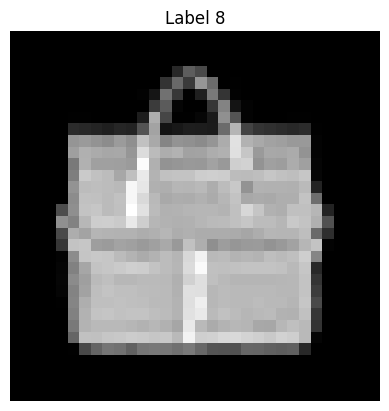

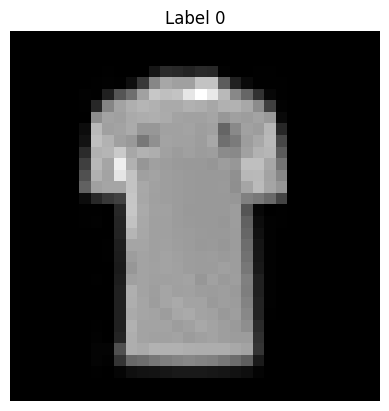

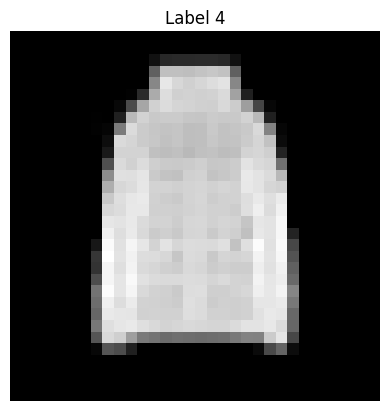

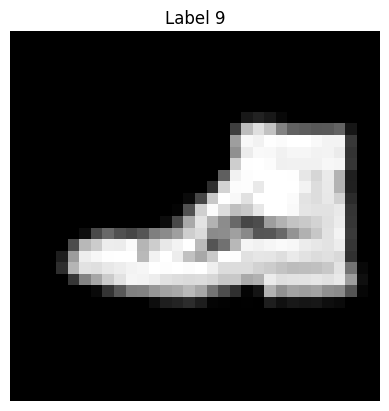

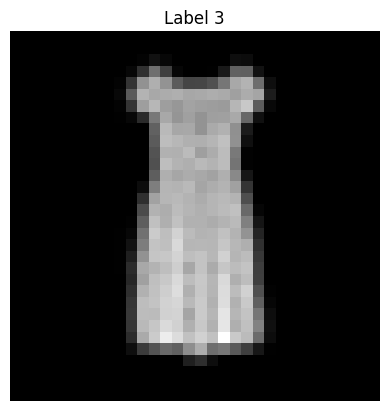

In [11]:
random_rows = data.sample(n=5)

for index, row in random_rows.iterrows():
    row_data = row.values

    image = np.array(row_data).reshape(32, 32)

    plt.imshow(image, cmap='gray')
    plt.axis('off')  # Hide axes
    plt.title(f"Label {targets[index]}")
    plt.show()

Construct a Feedforward neural network

First create data loaders:

In [12]:
training_loader = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=True)
validation_loader = torch.utils.data.DataLoader(val_data, batch_size=128, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=128, shuffle=False)
training_loader_norm = torch.utils.data.DataLoader(train_data_norm, batch_size=32, shuffle=True)
validation_loader_norm = torch.utils.data.DataLoader(val_data_norm, batch_size=128, shuffle=False)
test_loader_norm = torch.utils.data.DataLoader(test_data_norm, batch_size=128, shuffle=False)


In [13]:
dataiter = iter(training_loader)
images, labels = next(dataiter)
images, labels = images, labels
print(images.shape)
print(labels.shape)

torch.Size([32, 1024])
torch.Size([32])


Define a neural network class:

In [14]:
class MyNet(nn.Module):
        def __init__(self,hidden_layer_size, num_hidden_layers):
            super(MyNet, self).__init__()
            self.num_hidden_layers = num_hidden_layers
            self.layers = nn.ModuleList()
            #input layer
            self.layers.append(nn.Linear(1024, hidden_layer_size))
            # hidden layers
            for _ in range(num_hidden_layers):
                self.layers.append(nn.Linear(hidden_layer_size, hidden_layer_size))
            #output layer
            self.layers.append(nn.Linear(hidden_layer_size, 10))

        def forward(self, x):
            for i in range (self.num_hidden_layers):
                x = F.relu(self.layers[i](x))
            x = self.layers[self.num_hidden_layers](x)
            return x


In [15]:
def train_one_epoch(model, loss_fn, optimizer, training_loader, device):
    running_cum_loss = 0.

    for i, data in enumerate(training_loader):
        # Every data instance is an input + label pair
        inputs, labels = data[0].to(device), data[1].to(device)  # Move data to device

        # Zero gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        # print(outputs.shape, labels.shape)

        # Compute the loss
        loss = loss_fn(outputs, labels)
        
        # Backpropagation
        loss.backward()

        # Update weights
        optimizer.step()

        # Gather data and report
        last_mean_loss = loss.item()
        running_cum_loss += last_mean_loss * inputs.shape[0]
        # if i % 300 == 299:
        #     print(f"  Batch {i+1}, Loss: {last_mean_loss:.3f}")
            
    # Return average loss over the whole training set
    return running_cum_loss / len(training_loader.dataset)

In [16]:
model = MyNet(32,3).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())
train_one_epoch(model, loss_fn, optimizer, training_loader, device)

0.934914697828747

In [17]:
def train_model(num_hidden_layers, hidden_layer_size, optimizer, device, EPOCHS=1000, lr=0.001, early_stop_epochs=20):
    model = MyNet(hidden_layer_size, num_hidden_layers).to(device)
    loss_fn = nn.CrossEntropyLoss()
    if optimizer == "Adam":
        optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    else: 
        optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    best_vacc = 0.0  # Best validation accuracy
    epochs_without_improvement = 0  # Count of epochs without improvement
    best_epochs_num = 0 

    for epoch in range(EPOCHS):
        #print('EPOCH {}:'.format(epoch + 1))
        
        # One training step
        avg_loss = train_one_epoch(model, loss_fn, optimizer, training_loader, device)
        
        # Validation performance
        running_cum_vloss = 0.0
        vcorrect = 0
        for i, vdata in enumerate(validation_loader):
            vinputs, vlabels = vdata[0].to(device), vdata[1].to(device)  # Move validation data to device
            with torch.no_grad():
                voutputs = model(vinputs)
                vloss = loss_fn(voutputs, vlabels)
            running_cum_vloss += vloss * vinputs.shape[0]
            # Count the correctly classified samples
            vcorrect += (voutputs.argmax(1) == vlabels).float().sum()
        
        # Get average loss and accuracy
        avg_vloss = running_cum_vloss / len(validation_loader.dataset)
        vacc = vcorrect / len(validation_loader.dataset)
        
        #print(f"TRAIN loss: {avg_loss:.3f}, VALIDATION loss: {avg_vloss:.3f}, accuracy: {vacc:.3f}")
        
        # Check if validation accuracy improved
        if vacc > best_vacc:
            best_vacc = vacc
            best_epochs_num = epoch
            epochs_without_improvement = 0
        else:
            epochs_without_improvement += 1
        
        # Check for early stopping
        if epochs_without_improvement >= early_stop_epochs:
            #print(f"Validation accuracy did not improve for {early_stop_epochs} epochs. Stopping training.")
            break

    #print("Training finished. Best accuracy was: ", best_vacc)
    return best_vacc,best_epochs_num

In [113]:
# Define different layer configurations
num_hidden_layers_list = range(4)
hidden_layer_sizes = [32,64,128,256]
optimizers= [
    "SGD",
    "Adam"
]

best_accuracy = 0.0
best_epochs_num = 0
best_params = None

# Train models with different configurations

for optimizer in optimizers:
    for num_hidden_layers in num_hidden_layers_list:
        for hidden_layer_size in hidden_layer_sizes:
            print(f"Hidden Layers: {num_hidden_layers}, Hidden Layer Size: {hidden_layer_size}, Optimizer: {optimizer}")
            accuracy, best_epochs_num = train_model(num_hidden_layers, hidden_layer_size, optimizer, device)
             # Check if current configuration has better accuracy
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_params = {
                    "num_hidden_layers": num_hidden_layers,
                    "hidden_layer_size": hidden_layer_size,
                    "optimizer": optimizer
                }
                
print("Best parameters:")
print(best_params)
print("Best accuracy:", best_accuracy)

Hidden Layers: 0, Hidden Layer Size: 32, Optimizer: SGD
Hidden Layers: 0, Hidden Layer Size: 64, Optimizer: SGD
Hidden Layers: 0, Hidden Layer Size: 128, Optimizer: SGD
Hidden Layers: 0, Hidden Layer Size: 256, Optimizer: SGD
Hidden Layers: 1, Hidden Layer Size: 32, Optimizer: SGD
Hidden Layers: 1, Hidden Layer Size: 64, Optimizer: SGD
Hidden Layers: 1, Hidden Layer Size: 128, Optimizer: SGD
Hidden Layers: 1, Hidden Layer Size: 256, Optimizer: SGD
Hidden Layers: 2, Hidden Layer Size: 32, Optimizer: SGD
Hidden Layers: 2, Hidden Layer Size: 64, Optimizer: SGD
Hidden Layers: 2, Hidden Layer Size: 128, Optimizer: SGD
Hidden Layers: 2, Hidden Layer Size: 256, Optimizer: SGD
Hidden Layers: 3, Hidden Layer Size: 32, Optimizer: SGD
Hidden Layers: 3, Hidden Layer Size: 64, Optimizer: SGD
Hidden Layers: 3, Hidden Layer Size: 128, Optimizer: SGD
Hidden Layers: 3, Hidden Layer Size: 256, Optimizer: SGD
Hidden Layers: 0, Hidden Layer Size: 32, Optimizer: Adam
Hidden Layers: 0, Hidden Layer Size: 64

In [118]:
print("Best parameters with number of epochs: ", best_epochs_num)
print(best_params)
print("Best accuracy:", best_accuracy)
#save accuracy, parameters and number of epochs
best_params_FF= best_params
best_acc_FF = best_accuracy
best_epochs_num_FF = best_epochs_num

Best parameters with number of epochs:  35
{'num_hidden_layers': 3, 'hidden_layer_size': 256, 'optimizer': 'SGD'}
Best accuracy: tensor(0.8494, device='cuda:0')


Add parameter normalized to the function for future usings:

In [18]:
def train_model_1(num_hidden_layers, hidden_layer_size, optimizer, device, normalized=False, EPOCHS=1000, lr=0.001, early_stop_epochs=20):
    model = MyNet(hidden_layer_size, num_hidden_layers).to(device)
    loss_fn = nn.CrossEntropyLoss()
    if optimizer == "Adam":
        optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    else: 
        optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    best_vacc = 0.0  # Best validation accuracy
    epochs_without_improvement = 0  # Count of epochs without improvement
    best_epochs_num = 0 
    if normalized:
        T_loader = training_loader_norm
        V_loader = validation_loader_norm
    else:
        T_loader = training_loader
        V_loader = validation_loader
    for epoch in range(EPOCHS):
        #print('EPOCH {}:'.format(epoch + 1))
        
        # One training step
        avg_loss = train_one_epoch(model, loss_fn, optimizer, T_loader, device)
        
        # Validation performance
        running_cum_vloss = 0.0
        vcorrect = 0
        for i, vdata in enumerate(V_loader):
            vinputs, vlabels = vdata[0].to(device), vdata[1].to(device)  # Move validation data to device
            with torch.no_grad():
                voutputs = model(vinputs)
                vloss = loss_fn(voutputs, vlabels)
            running_cum_vloss += vloss * vinputs.shape[0]
            # Count the correctly classified samples
            vcorrect += (voutputs.argmax(1) == vlabels).float().sum()
        
        # Get average loss and accuracy
        avg_vloss = running_cum_vloss / len(V_loader.dataset)
        vacc = vcorrect / len(V_loader.dataset)
        
        #print(f"TRAIN loss: {avg_loss:.3f}, VALIDATION loss: {avg_vloss:.3f}, accuracy: {vacc:.3f}")
        
        # Check if validation accuracy improved
        if vacc > best_vacc:
            best_vacc = vacc
            best_epochs_num = epoch
            epochs_without_improvement = 0
        else:
            epochs_without_improvement += 1
        
        # Check for early stopping
        if epochs_without_improvement >= early_stop_epochs:
            #print(f"Validation accuracy did not improve for {early_stop_epochs} epochs. Stopping training.")
            break

    #print("Training finished. Best accuracy was: ", best_vacc)
    return best_vacc,best_epochs_num

In [119]:
best_accuracy = 0.0
best_epochs_num = 0
best_params = None

for optimizer in optimizers:
    for num_hidden_layers in num_hidden_layers_list:
        for hidden_layer_size in hidden_layer_sizes:
            print(f"Hidden Layers: {num_hidden_layers}, Hidden Layer Size: {hidden_layer_size}, Optimizer: {optimizer}")
            accuracy, best_epochs_num = train_model_1(num_hidden_layers, hidden_layer_size, optimizer, device, True)
             # Check if current configuration has better accuracy
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_params = {
                    "num_hidden_layers": num_hidden_layers,
                    "hidden_layer_size": hidden_layer_size,
                    "optimizer": optimizer
                }

Hidden Layers: 0, Hidden Layer Size: 32, Optimizer: SGD
Hidden Layers: 0, Hidden Layer Size: 64, Optimizer: SGD
Hidden Layers: 0, Hidden Layer Size: 128, Optimizer: SGD
Hidden Layers: 0, Hidden Layer Size: 256, Optimizer: SGD
Hidden Layers: 1, Hidden Layer Size: 32, Optimizer: SGD
Hidden Layers: 1, Hidden Layer Size: 64, Optimizer: SGD
Hidden Layers: 1, Hidden Layer Size: 128, Optimizer: SGD
Hidden Layers: 1, Hidden Layer Size: 256, Optimizer: SGD
Hidden Layers: 2, Hidden Layer Size: 32, Optimizer: SGD
Hidden Layers: 2, Hidden Layer Size: 64, Optimizer: SGD
Hidden Layers: 2, Hidden Layer Size: 128, Optimizer: SGD
Hidden Layers: 2, Hidden Layer Size: 256, Optimizer: SGD
Hidden Layers: 3, Hidden Layer Size: 32, Optimizer: SGD
Hidden Layers: 3, Hidden Layer Size: 64, Optimizer: SGD
Hidden Layers: 3, Hidden Layer Size: 128, Optimizer: SGD
Hidden Layers: 3, Hidden Layer Size: 256, Optimizer: SGD
Hidden Layers: 0, Hidden Layer Size: 32, Optimizer: Adam
Hidden Layers: 0, Hidden Layer Size: 64

In [120]:
print("Best parameters with number of epochs: ", best_epochs_num)
print(best_params)
print("Best accuracy:", best_accuracy)
#save accuracy, parameters and number of epochs
best_accuracy_FF_n = best_accuracy
best_epochs_num_FF_n = best_epochs_num
best_params_FF_n = best_params

Best parameters with number of epochs:  18
{'num_hidden_layers': 3, 'hidden_layer_size': 256, 'optimizer': 'Adam'}
Best accuracy: tensor(0.8519, device='cuda:0')


Now try applying Dropout regularization method:

In [19]:
class MyNet_drop(nn.Module):
        def __init__(self,hidden_layer_size, num_hidden_layers):
            super(MyNet_drop, self).__init__()
            self.num_hidden_layers = num_hidden_layers
            self.layers = nn.ModuleList()
            self.dropout_in = nn.Dropout( p = 0.1)
            self.dropout_h = nn.Dropout( p = 0.5)
            #input layer
            self.layers.append(nn.Linear(1024, hidden_layer_size))
            # hidden layers
            for _ in range(num_hidden_layers):
                self.layers.append(nn.Linear(hidden_layer_size, hidden_layer_size))
            #output layer
            self.layers.append(nn.Linear(hidden_layer_size, 10))
            # for i in range (1,self.num_hidden_layers):
            #     print(self.layers[i])

        def forward(self, x):
            x = F.relu(self.layers[0](x))
            x = self.dropout_in(x)
            for i in range (1,self.num_hidden_layers+1):
                x = F.relu(self.layers[i](x))
                x = self.dropout_h(x)
            x = self.layers[self.num_hidden_layers+1](x)
            return x

# model = MyNet_drop(32 , 2)

In [24]:
def train_model_w_dr(num_hidden_layers, hidden_layer_size, optimizer, device, normalized=False, EPOCHS=1000, lr=0.001, early_stop_epochs=20):
    model = MyNet_drop(hidden_layer_size, num_hidden_layers).to(device)
    loss_fn = nn.CrossEntropyLoss()
    if optimizer == "Adam":
        optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    else: 
        optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    best_vacc = 0.0  # Best validation accuracy
    epochs_without_improvement = 0  # Count of epochs without improvement
    best_epochs_num = 0 
    if normalized:
        T_loader = training_loader_norm
        V_loader = validation_loader_norm
    else:
        T_loader = training_loader
        V_loader = validation_loader
    for epoch in range(EPOCHS):
        #print('EPOCH {}:'.format(epoch + 1))
        
        # One training step
        avg_loss = train_one_epoch(model, loss_fn, optimizer, T_loader, device)
        
        # Validation performance
        running_cum_vloss = 0.0
        vcorrect = 0
        for i, vdata in enumerate(V_loader):
            vinputs, vlabels = vdata[0].to(device), vdata[1].to(device)  # Move validation data to device
            with torch.no_grad():
                voutputs = model(vinputs)
                vloss = loss_fn(voutputs, vlabels)
            running_cum_vloss += vloss * vinputs.shape[0]
            # Count the correctly classified samples
            vcorrect += (voutputs.argmax(1) == vlabels).float().sum()
        
        # Get average loss and accuracy
        avg_vloss = running_cum_vloss / len(V_loader.dataset)
        vacc = vcorrect / len(V_loader.dataset)
        
        #print(f"TRAIN loss: {avg_loss:.3f}, VALIDATION loss: {avg_vloss:.3f}, accuracy: {vacc:.3f}")
        
        # Check if validation accuracy improved
        if vacc > best_vacc:
            best_vacc = vacc
            best_epochs_num = epoch
            epochs_without_improvement = 0
        else:
            epochs_without_improvement += 1
        
        # Check for early stopping
        if epochs_without_improvement >= early_stop_epochs:
            #print(f"Validation accuracy did not improve for {early_stop_epochs} epochs. Stopping training.")
            break

    #print("Training finished. Best accuracy was: ", best_vacc)
    return best_vacc,best_epochs_num

In [202]:
best_accuracy = 0.0
best_epochs_num = 0
best_params = None

for optimizer in optimizers:
    for num_hidden_layers in num_hidden_layers_list:
        for hidden_layer_size in hidden_layer_sizes:
            print(f"Hidden Layers: {num_hidden_layers}, Hidden Layer Size: {hidden_layer_size}, Optimizer: {optimizer}")
            accuracy, best_epochs_num = train_model_w_dr(num_hidden_layers, hidden_layer_size, optimizer, device)
             # Check if current configuration has better accuracy
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_params = {
                    "num_hidden_layers": num_hidden_layers,
                    "hidden_layer_size": hidden_layer_size,
                    "optimizer": optimizer
                }

Hidden Layers: 0, Hidden Layer Size: 32, Optimizer: SGD
Hidden Layers: 0, Hidden Layer Size: 64, Optimizer: SGD
Hidden Layers: 0, Hidden Layer Size: 128, Optimizer: SGD
Hidden Layers: 0, Hidden Layer Size: 256, Optimizer: SGD
Hidden Layers: 1, Hidden Layer Size: 32, Optimizer: SGD
Hidden Layers: 1, Hidden Layer Size: 64, Optimizer: SGD
Hidden Layers: 1, Hidden Layer Size: 128, Optimizer: SGD
Hidden Layers: 1, Hidden Layer Size: 256, Optimizer: SGD
Hidden Layers: 2, Hidden Layer Size: 32, Optimizer: SGD
Hidden Layers: 2, Hidden Layer Size: 64, Optimizer: SGD
Hidden Layers: 2, Hidden Layer Size: 128, Optimizer: SGD
Hidden Layers: 2, Hidden Layer Size: 256, Optimizer: SGD
Hidden Layers: 3, Hidden Layer Size: 32, Optimizer: SGD
Hidden Layers: 3, Hidden Layer Size: 64, Optimizer: SGD
Hidden Layers: 3, Hidden Layer Size: 128, Optimizer: SGD
Hidden Layers: 3, Hidden Layer Size: 256, Optimizer: SGD
Hidden Layers: 0, Hidden Layer Size: 32, Optimizer: Adam
Hidden Layers: 0, Hidden Layer Size: 64

In [203]:
print("Best parameters with number of epochs: ", best_epochs_num)
print(best_params)
print("Best accuracy:", best_accuracy)
#save accuracy, parameters and number of epochs
best_accuracy_FF_Dr = best_accuracy
best_epochs_num_FF_Dr = best_epochs_num
best_params_FF_Dr = best_params

Best parameters with number of epochs:  60
{'num_hidden_layers': 3, 'hidden_layer_size': 256, 'optimizer': 'SGD'}
Best accuracy: tensor(0.8347, device='cuda:0')


As we can see using dropout didn't significantly improve the baasic FF model but also is worse than basic model with normalized data

now try applying dropout method for normalized data

In [204]:
best_accuracy = 0.0
best_epochs_num = 0
best_params = None

for optimizer in optimizers:
    for num_hidden_layers in num_hidden_layers_list:
        for hidden_layer_size in hidden_layer_sizes:
            print(f"Hidden Layers: {num_hidden_layers}, Hidden Layer Size: {hidden_layer_size}, Optimizer: {optimizer}")
            accuracy, best_epochs_num = train_model_w_dr(num_hidden_layers, hidden_layer_size, optimizer, device, True)
             # Check if current configuration has better accuracy
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_params = {
                    "num_hidden_layers": num_hidden_layers,
                    "hidden_layer_size": hidden_layer_size,
                    "optimizer": optimizer
                }

Hidden Layers: 0, Hidden Layer Size: 32, Optimizer: SGD
Hidden Layers: 0, Hidden Layer Size: 64, Optimizer: SGD
Hidden Layers: 0, Hidden Layer Size: 128, Optimizer: SGD
Hidden Layers: 0, Hidden Layer Size: 256, Optimizer: SGD
Hidden Layers: 1, Hidden Layer Size: 32, Optimizer: SGD
Hidden Layers: 1, Hidden Layer Size: 64, Optimizer: SGD
Hidden Layers: 1, Hidden Layer Size: 128, Optimizer: SGD
Hidden Layers: 1, Hidden Layer Size: 256, Optimizer: SGD
Hidden Layers: 2, Hidden Layer Size: 32, Optimizer: SGD
Hidden Layers: 2, Hidden Layer Size: 64, Optimizer: SGD
Hidden Layers: 2, Hidden Layer Size: 128, Optimizer: SGD
Hidden Layers: 2, Hidden Layer Size: 256, Optimizer: SGD
Hidden Layers: 3, Hidden Layer Size: 32, Optimizer: SGD
Hidden Layers: 3, Hidden Layer Size: 64, Optimizer: SGD
Hidden Layers: 3, Hidden Layer Size: 128, Optimizer: SGD
Hidden Layers: 3, Hidden Layer Size: 256, Optimizer: SGD
Hidden Layers: 0, Hidden Layer Size: 32, Optimizer: Adam
Hidden Layers: 0, Hidden Layer Size: 64

In [205]:
print("Best parameters with number of epochs: ", best_epochs_num)
print(best_params)
print("Best accuracy:", best_accuracy)
#save accuracy, parameters and number of epochs
best_accuracy_FF_Dr_n = best_accuracy
best_epochs_num_FF_Dr_n = best_epochs_num
best_params_FF_Dr_n = best_params

Best parameters with number of epochs:  70
{'num_hidden_layers': 0, 'hidden_layer_size': 256, 'optimizer': 'Adam'}
Best accuracy: tensor(0.8442, device='cuda:0')


Try dropout + L1:

In [20]:
def train_one_epoch_lreg(model, loss_fn, optimizer, training_loader, device, l_alpha = 0.1):
    running_cum_loss = 0.

    # tqdm is used for nice progress visualisation
    for i, data in enumerate(training_loader):
        # Every data instance is an input + label pair
        inputs, labels = data[0].to(device), data[1].to(device)

        # Zero your gradients for every batch!
        optimizer.zero_grad()

        # Make predictions for this batch
        outputs = model(inputs)

        # Compute the loss and its gradients
        loss = loss_fn(outputs, labels)
        
        # compute the penalization
        l_reg = torch.tensor(0.).to(device)
        l_reg += torch.linalg.vector_norm(model.layers[model.num_hidden_layers+1].weight.flatten(),1)
        
        loss = loss + l_alpha*l_reg.to(device)
        
        # Backpropagation
        loss.backward()

        # Adjust learning weights
        optimizer.step()

        # Gather data and report
        last_mean_loss = loss.item()
        running_cum_loss += last_mean_loss * inputs.shape[0]
            
    # Return of the average over the whole training set
    return running_cum_loss / len(train_data)

In [21]:
def train_model_w_dr_L1(num_hidden_layers, hidden_layer_size, optimizer, device, normalized=False, EPOCHS=1000, lr=0.001, early_stop_epochs=20):
    model = MyNet_drop(hidden_layer_size, num_hidden_layers).to(device)
    loss_fn = nn.CrossEntropyLoss()
    if optimizer == "Adam":
        optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    else: 
        optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    best_vacc = 0.0  # Best validation accuracy
    epochs_without_improvement = 0  # Count of epochs without improvement
    best_epochs_num = 0 
    if normalized:
        T_loader = training_loader_norm
        V_loader = validation_loader_norm
    else:
        T_loader = training_loader
        V_loader = validation_loader
    for epoch in range(EPOCHS):
        #print('EPOCH {}:'.format(epoch + 1))
        
        # One training step
        avg_loss = train_one_epoch_lreg(model, loss_fn, optimizer, T_loader, device)
        
        # Validation performance
        running_cum_vloss = 0.0
        vcorrect = 0
        for i, vdata in enumerate(V_loader):
            vinputs, vlabels = vdata[0].to(device), vdata[1].to(device)  # Move validation data to device
            with torch.no_grad():
                voutputs = model(vinputs)
                vloss = loss_fn(voutputs, vlabels)
            running_cum_vloss += vloss * vinputs.shape[0]
            # Count the correctly classified samples
            vcorrect += (voutputs.argmax(1) == vlabels).float().sum()
        
        # Get average loss and accuracy
        avg_vloss = running_cum_vloss / len(V_loader.dataset)
        vacc = vcorrect / len(V_loader.dataset)
        
        #print(f"TRAIN loss: {avg_loss:.3f}, VALIDATION loss: {avg_vloss:.3f}, accuracy: {vacc:.3f}")
        
        # Check if validation accuracy improved
        if vacc > best_vacc:
            best_vacc = vacc
            best_epochs_num = epoch
            epochs_without_improvement = 0
        else:
            epochs_without_improvement += 1
        
        # Check for early stopping
        if epochs_without_improvement >= early_stop_epochs:
            #print(f"Validation accuracy did not improve for {early_stop_epochs} epochs. Stopping training.")
            break

    #print("Training finished. Best accuracy was: ", best_vacc)
    return best_vacc,best_epochs_num

In [208]:
best_accuracy = 0.0
best_epochs_num = 0
best_params = None

for optimizer in optimizers:
    for num_hidden_layers in num_hidden_layers_list:
        for hidden_layer_size in hidden_layer_sizes:
            print(f"Hidden Layers: {num_hidden_layers}, Hidden Layer Size: {hidden_layer_size}, Optimizer: {optimizer}")
            accuracy, best_epochs_num = train_model_w_dr_L1(num_hidden_layers, hidden_layer_size, optimizer, device)
             # Check if current configuration has better accuracy
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_params = {
                    "num_hidden_layers": num_hidden_layers,
                    "hidden_layer_size": hidden_layer_size,
                    "optimizer": optimizer
                }

Hidden Layers: 0, Hidden Layer Size: 32, Optimizer: SGD
Hidden Layers: 0, Hidden Layer Size: 64, Optimizer: SGD
Hidden Layers: 0, Hidden Layer Size: 128, Optimizer: SGD
Hidden Layers: 0, Hidden Layer Size: 256, Optimizer: SGD
Hidden Layers: 1, Hidden Layer Size: 32, Optimizer: SGD
Hidden Layers: 1, Hidden Layer Size: 64, Optimizer: SGD
Hidden Layers: 1, Hidden Layer Size: 128, Optimizer: SGD
Hidden Layers: 1, Hidden Layer Size: 256, Optimizer: SGD
Hidden Layers: 2, Hidden Layer Size: 32, Optimizer: SGD
Hidden Layers: 2, Hidden Layer Size: 64, Optimizer: SGD
Hidden Layers: 2, Hidden Layer Size: 128, Optimizer: SGD
Hidden Layers: 2, Hidden Layer Size: 256, Optimizer: SGD
Hidden Layers: 3, Hidden Layer Size: 32, Optimizer: SGD
Hidden Layers: 3, Hidden Layer Size: 64, Optimizer: SGD
Hidden Layers: 3, Hidden Layer Size: 128, Optimizer: SGD
Hidden Layers: 3, Hidden Layer Size: 256, Optimizer: SGD
Hidden Layers: 0, Hidden Layer Size: 32, Optimizer: Adam
Hidden Layers: 0, Hidden Layer Size: 64

In [209]:
print("Best parameters with number of epochs: ", best_epochs_num)
print(best_params)
print("Best accuracy:", best_accuracy)
#save accuracy, parameters and number of epochs
best_accuracy_FF_Dr_R1 = best_accuracy
best_epochs_num_FF_Dr_R1 = best_epochs_num
best_params_FF_Dr_R1 = best_params

Best parameters with number of epochs:  28
{'num_hidden_layers': 1, 'hidden_layer_size': 256, 'optimizer': 'SGD'}
Best accuracy: tensor(0.8275, device='cuda:0')


with normalized data:

In [210]:
best_accuracy = 0.0
best_epochs_num = 0
best_params = None

for optimizer in optimizers:
    for num_hidden_layers in num_hidden_layers_list:
        for hidden_layer_size in hidden_layer_sizes:
            print(f"Hidden Layers: {num_hidden_layers}, Hidden Layer Size: {hidden_layer_size}, Optimizer: {optimizer}")
            accuracy, best_epochs_num = train_model_w_dr_L1(num_hidden_layers, hidden_layer_size, optimizer, device, True)
             # Check if current configuration has better accuracy
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_params = {
                    "num_hidden_layers": num_hidden_layers,
                    "hidden_layer_size": hidden_layer_size,
                    "optimizer": optimizer
                }

Hidden Layers: 0, Hidden Layer Size: 32, Optimizer: SGD
Hidden Layers: 0, Hidden Layer Size: 64, Optimizer: SGD
Hidden Layers: 0, Hidden Layer Size: 128, Optimizer: SGD
Hidden Layers: 0, Hidden Layer Size: 256, Optimizer: SGD
Hidden Layers: 1, Hidden Layer Size: 32, Optimizer: SGD
Hidden Layers: 1, Hidden Layer Size: 64, Optimizer: SGD
Hidden Layers: 1, Hidden Layer Size: 128, Optimizer: SGD
Hidden Layers: 1, Hidden Layer Size: 256, Optimizer: SGD
Hidden Layers: 2, Hidden Layer Size: 32, Optimizer: SGD
Hidden Layers: 2, Hidden Layer Size: 64, Optimizer: SGD
Hidden Layers: 2, Hidden Layer Size: 128, Optimizer: SGD
Hidden Layers: 2, Hidden Layer Size: 256, Optimizer: SGD
Hidden Layers: 3, Hidden Layer Size: 32, Optimizer: SGD
Hidden Layers: 3, Hidden Layer Size: 64, Optimizer: SGD
Hidden Layers: 3, Hidden Layer Size: 128, Optimizer: SGD
Hidden Layers: 3, Hidden Layer Size: 256, Optimizer: SGD
Hidden Layers: 0, Hidden Layer Size: 32, Optimizer: Adam
Hidden Layers: 0, Hidden Layer Size: 64

In [212]:
print("Best parameters with number of epochs: ", best_epochs_num)
print(best_params)
print("Best accuracy:", best_accuracy)
#save accuracy, parameters and number of epochs
best_accuracy_FF_Dr_R1_n = best_accuracy
best_epochs_num_FF_Dr_R1_n = best_epochs_num
best_params_FF_Dr_R1_n = best_params

Best parameters with number of epochs:  50
{'num_hidden_layers': 1, 'hidden_layer_size': 256, 'optimizer': 'Adam'}
Best accuracy: tensor(0.8414, device='cuda:0')


As we can see, neither dropout nor dropout + R1 improved the accuracy. Simple FF model trained on normalized data seems to have the best result.

A convolutional neural network should provide us with better accuracy, as these networks are primarily used for working with images:

In [23]:
#first reshape flattened image vektor to 32*32 matrix


def reshape_dataset(dataset):
    reshaped_dataset = []
    for data, label in dataset:
        # Reshape data tensor to [32, 32]
        reshaped_data = torch.reshape(data, (32, 32)).to(device)
        # Add a singleton dimension for the channel
        reshaped_data = reshaped_data.unsqueeze(0)
        # Reshape label tensor to [1]
        reshaped_dataset.append((reshaped_data, label))
    return reshaped_dataset


# Create reshaped datasets
train_data_reshaped = reshape_dataset(train_data)
val_data_reshaped = reshape_dataset(val_data)
test_data_reshaped = reshape_dataset(test_data)
train_data_reshaped_norm = reshape_dataset(train_data_norm)
val_data_reshaped_norm = reshape_dataset(val_data_norm)
test_data_reshaped_norm = reshape_dataset(test_data_norm)

In [24]:
#show it:
print(train_data_reshaped[0][0].shape)
#done

training_loader_reshaped = torch.utils.data.DataLoader(train_data_reshaped, batch_size=32, shuffle=True)
validation_loader_reshaped = torch.utils.data.DataLoader(val_data_reshaped, batch_size=128, shuffle=False)
test_loader_reshaped = torch.utils.data.DataLoader(test_data_reshaped, batch_size=128, shuffle=False)
training_loader_reshaped_norm = torch.utils.data.DataLoader(train_data_reshaped_norm, batch_size=32, shuffle=True)
validation_loader_reshaped_norm = torch.utils.data.DataLoader(val_data_reshaped_norm, batch_size=128, shuffle=False)
test_loader_reshaped_norm = torch.utils.data.DataLoader(test_data_reshaped_norm, batch_size=128, shuffle=False)

# dataiter_reshaped = iter(training_loader_reshaped)

torch.Size([1, 32, 32])


In [25]:
dataiter_reshaped = iter(training_loader_reshaped)
images, labels = next(dataiter_reshaped)
print(images.shape)
print(labels.shape)

torch.Size([32, 1, 32, 32])
torch.Size([32])


Create a convolutional neural network:

In [26]:
class MyCNN(nn.Module):
    def __init__(self, num_conv_layers, num_hidden_layers, hidden_layer_size, kernel_size=2):
        super(MyCNN, self).__init__()
        
        self.num_conv_layers = num_conv_layers
        
        self.kernel_size = kernel_size
        
        self.hidden_layers = nn.ModuleList()
        self.hidden_layer_size = hidden_layer_size

        width = 32
        input_size = width
        
        # Add convolutional layers
        self.conv_layers = nn.ModuleList()
        in_channels = 1 # for first layer
        for _ in range(num_conv_layers):
            conv_layer = nn.Conv2d(in_channels = in_channels, out_channels = 32, kernel_size = 3)
            self.conv_layers.append(conv_layer)
            in_channels = 32
            input_size = int((input_size - 3 + 1)/2)
            
        # Max pooling layer
        self.pool = nn.MaxPool2d(kernel_size = kernel_size, stride=2)
        input_size = 32 * input_size * input_size
        for _ in range(num_hidden_layers):
            hidden_layer = nn.Linear(input_size, hidden_layer_size)
            self.hidden_layers.append(hidden_layer)
            input_size = hidden_layer_size
        
        # Fully connected layers
        self.fco = nn.Linear(input_size, 10)
        
    def forward(self, x):
         # Apply convolutional layers
        for conv_layer in self.conv_layers:
            x = F.relu(conv_layer(x))
            x = self.pool(x)
        
        # Flatten the output
        x = x.flatten(start_dim = 1)
        
        # Apply hidden layers
        for hidden_layer in self.hidden_layers:
            x = F.relu(hidden_layer(x))
        
        x = self.fco(x)
        return x


model = MyCNN(3,2,32,2).to(device)
outputs = model(images)
print(images.shape, outputs.shape, labels[1])

torch.Size([32, 1, 32, 32]) torch.Size([32, 10]) tensor(2, device='cuda:0')


In [27]:
def train_model_CNN(num_conv_layers, num_hidden_layers, hidden_layer_size, optimizer, device, normalized=False, EPOCHS=1000, lr=0.001, early_stop_epochs=20):
    model = MyCNN(num_conv_layers, num_hidden_layers, hidden_layer_size).to(device)
    loss_fn = nn.CrossEntropyLoss()
    if optimizer == "Adam":
        optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    else: 
        optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    best_vacc = 0.0  # Best validation accuracy
    epochs_without_improvement = 0  # Count of epochs without improvement
    best_epochs_num = 0 
    if normalized:
        T_loader = training_loader_reshaped_norm
        V_loader = validation_loader_reshaped_norm
    else:
        T_loader = training_loader_reshaped
        V_loader = validation_loader_reshaped
    for epoch in range(EPOCHS):
        #print('EPOCH {}:'.format(epoch + 1))
        
        # One training step
        avg_loss = train_one_epoch(model, loss_fn, optimizer, T_loader, device)
        
        # Validation performance
        running_cum_vloss = 0.0
        vcorrect = 0
        for i, vdata in enumerate(V_loader):
            vinputs, vlabels = vdata[0].to(device), vdata[1].to(device)  # Move validation data to device
            with torch.no_grad():
                voutputs = model(vinputs)
                vloss = loss_fn(voutputs, vlabels)
            running_cum_vloss += vloss * vinputs.shape[0]
            # Count the correctly classified samples
            vcorrect += (voutputs.argmax(1) == vlabels).float().sum()
        
        # Get average loss and accuracy
        avg_vloss = running_cum_vloss / len(V_loader.dataset)
        vacc = vcorrect / len(V_loader.dataset)
        
        #print(f"TRAIN loss: {avg_loss:.3f}, VALIDATION loss: {avg_vloss:.3f}, accuracy: {vacc:.3f}")
        
        # Check if validation accuracy improved
        if vacc > best_vacc:
            best_vacc = vacc
            best_epochs_num = epoch
            epochs_without_improvement = 0
        else:
            epochs_without_improvement += 1
        
        # Check for early stopping
        if epochs_without_improvement >= early_stop_epochs:
            #print(f"Validation accuracy did not improve for {early_stop_epochs} epochs. Stopping training.")
            break

    #print("Training finished. Best accuracy was: ", best_vacc)
    return best_vacc,best_epochs_num

In [450]:
num_conv_layers_list = range(1,4)
best_accuracy = 0.0
best_epochs_num = 0
best_params = None

for optimizer in optimizers:
    for num_conv_layers in num_conv_layers_list:
        for num_hidden_layers in num_hidden_layers_list:
            for hidden_layer_size in hidden_layer_sizes:
                print(f"Conv_layers: {num_conv_layers}, Hidden Layers: {num_hidden_layers}, Hidden Layer Size: {hidden_layer_size}, Optimizer: {optimizer}")
                accuracy, best_epochs_num = train_model_CNN(num_conv_layers, num_hidden_layers, hidden_layer_size, optimizer, device)
                # Check if current configuration has better accuracy
                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_params = {
                            "num_hidden_layers": num_hidden_layers,
                            "hidden_layer_size": hidden_layer_size,
                            "optimizer": optimizer,
                            "num_conv_layer": num_conv_layer
                            
                    }

Conv_layers: 1, Hidden Layers: 0, Hidden Layer Size: 32, Optimizer: SGD
Conv_layers: 1, Hidden Layers: 0, Hidden Layer Size: 64, Optimizer: SGD
Conv_layers: 1, Hidden Layers: 0, Hidden Layer Size: 128, Optimizer: SGD
Conv_layers: 1, Hidden Layers: 0, Hidden Layer Size: 256, Optimizer: SGD
Conv_layers: 1, Hidden Layers: 1, Hidden Layer Size: 32, Optimizer: SGD
Conv_layers: 1, Hidden Layers: 1, Hidden Layer Size: 64, Optimizer: SGD
Conv_layers: 1, Hidden Layers: 1, Hidden Layer Size: 128, Optimizer: SGD
Conv_layers: 1, Hidden Layers: 1, Hidden Layer Size: 256, Optimizer: SGD
Conv_layers: 1, Hidden Layers: 2, Hidden Layer Size: 32, Optimizer: SGD
Conv_layers: 1, Hidden Layers: 2, Hidden Layer Size: 64, Optimizer: SGD
Conv_layers: 1, Hidden Layers: 2, Hidden Layer Size: 128, Optimizer: SGD
Conv_layers: 1, Hidden Layers: 2, Hidden Layer Size: 256, Optimizer: SGD
Conv_layers: 1, Hidden Layers: 3, Hidden Layer Size: 32, Optimizer: SGD
Conv_layers: 1, Hidden Layers: 3, Hidden Layer Size: 64, O

In [451]:
print("Best parameters with number of epochs: ", best_epochs_num)
print(best_params)
print("Best accuracy:", best_accuracy)
#save accuracy, parameters and number of epochs
best_accuracy_CNN = best_accuracy
best_epochs_num_CNN = best_epochs_num
best_params_CNN = best_params

Best parameters with number of epochs:  32
{'num_hidden_layers': 3, 'hidden_layer_size': 256, 'optimizer': 'SGD', 'num_conv_layer': 1}
Best accuracy: tensor(0.8862, device='cuda:0')


In [41]:
# I made a typo with a num_conv layer parameter and also it didn't save best_number_epochs so I'll find it here:
best_epochs_num_CNN = 0
num_conv_layers_list = range(1,4)

best_accuracy = 0.0
best_epochs_num = 0
best_params = None

for num_conv_layers in num_conv_layers_list:
    print(f"Conv_layers: {num_conv_layers}, Hidden Layers: 3 , Hidden Layer Size: 256, Optimizer: SGD")
    accuracy, epochs_num = train_model_CNN(num_conv_layers, 3, 256, "SGD", device)
    # Check if current configuration has better accuracy
    if accuracy > best_accuracy:
        best_epochs_num = epochs_num
        best_accuracy = accuracy
        best_params = {
                            "num_hidden_layers": num_hidden_layers,
                            "hidden_layer_size": hidden_layer_size,
                            "optimizer": optimizer,
                            "num_conv_layer": num_conv_layers
                            
                        }


Conv_layers: 1, Hidden Layers: 3 , Hidden Layer Size: 256, Optimizer: SGD
Conv_layers: 2, Hidden Layers: 3 , Hidden Layer Size: 256, Optimizer: SGD
Conv_layers: 3, Hidden Layers: 3 , Hidden Layer Size: 256, Optimizer: SGD


In [42]:
print("Best parameters with number of epochs: ", best_epochs_num)
print(best_params)
print("Best accuracy:", best_accuracy)
#save accuracy, parameters and number of epochs
best_accuracy_CNN = best_accuracy
best_epochs_num_CNN = best_epochs_num
best_params_CNN = best_params

Best parameters with number of epochs:  58
{'num_hidden_layers': 0, 'hidden_layer_size': 32, 'optimizer': 'SGD', 'num_conv_layer': 2}
Best accuracy: tensor(0.8841, device='cuda:0')


As we can see CNN improved accuracy significantly  to ~0.885 accuracy. 

With dropout:

Add dropout to the network:

In [28]:
class MyCNN_w_dr(nn.Module):
    def __init__(self, num_conv_layers, num_hidden_layers, hidden_layer_size, kernel_size=2):
        super(MyCNN_w_dr, self).__init__()
        
        self.num_conv_layers = num_conv_layers
        
        self.kernel_size = kernel_size
        
        self.hidden_layers = nn.ModuleList()
        self.hidden_layer_size = hidden_layer_size

        self.conv_drop = nn.Dropout2d(p=0.1)

        width = 32
        input_size = width
        
        # Add convolutional layers
        self.conv_layers = nn.ModuleList()
        in_channels = 1 # for first layer
        for _ in range(num_conv_layers):
            conv_layer = nn.Conv2d(in_channels = in_channels, out_channels = 32, kernel_size = 3)
            self.conv_layers.append(conv_layer)
            in_channels = 32
            input_size = int((input_size - 3 + 1)/2)
            
        # Max pooling layer
        self.pool = nn.MaxPool2d(kernel_size = kernel_size, stride=2)
        input_size = 32 * input_size * input_size
        for _ in range(num_hidden_layers):
            hidden_layer = nn.Linear(input_size, hidden_layer_size)
            self.hidden_layers.append(hidden_layer)
            input_size = hidden_layer_size
        
        # Fully connected layers
        self.fco = nn.Linear(input_size, 10)
        
    def forward(self, x):
         # Apply convolutional layers
        for i, conv_layer in enumerate(self.conv_layers):
            x = F.relu(conv_layer(x))
            x = self.pool(x)
            if i == 0:
                x = self.conv_drop(x)
        
        # Flatten the output
        x = x.flatten(start_dim = 1)
        
        # Apply hidden layers
        for hidden_layer in self.hidden_layers:
            x = F.relu(hidden_layer(x))
        
        x = self.fco(x)
        return x


model = MyCNN_w_dr(3,2,32,2).to(device)
outputs = model(images)
print(images.shape, outputs.shape, labels[1])

torch.Size([32, 1, 32, 32]) torch.Size([32, 10]) tensor(2, device='cuda:0')


Training function:

In [29]:
def train_model_CNN_w_dr(num_conv_layers, num_hidden_layers, hidden_layer_size, optimizer, device, normalized=False, EPOCHS=1000, lr=0.001, early_stop_epochs=20):
    model = MyCNN_w_dr(num_conv_layers, num_hidden_layers, hidden_layer_size).to(device)
    loss_fn = nn.CrossEntropyLoss()
    if optimizer == "Adam":
        optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    else: 
        optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    best_vacc = 0.0  # Best validation accuracy
    epochs_without_improvement = 0  # Count of epochs without improvement
    best_epochs_num = 0 
    if normalized:
        T_loader = training_loader_reshaped_norm
        V_loader = validation_loader_reshaped_norm
    else:
        T_loader = training_loader_reshaped
        V_loader = validation_loader_reshaped
    for epoch in range(EPOCHS):
        #print('EPOCH {}:'.format(epoch + 1))
        
        # One training step
        avg_loss = train_one_epoch(model, loss_fn, optimizer, T_loader, device)
        
        # Validation performance
        running_cum_vloss = 0.0
        vcorrect = 0
        for i, vdata in enumerate(V_loader):
            vinputs, vlabels = vdata[0].to(device), vdata[1].to(device)  # Move validation data to device
            with torch.no_grad():
                voutputs = model(vinputs)
                vloss = loss_fn(voutputs, vlabels)
            running_cum_vloss += vloss * vinputs.shape[0]
            # Count the correctly classified samples
            vcorrect += (voutputs.argmax(1) == vlabels).float().sum()
        
        # Get average loss and accuracy
        avg_vloss = running_cum_vloss / len(V_loader.dataset)
        vacc = vcorrect / len(V_loader.dataset)
        
        #print(f"TRAIN loss: {avg_loss:.3f}, VALIDATION loss: {avg_vloss:.3f}, accuracy: {vacc:.3f}")
        
        # Check if validation accuracy improved
        if vacc > best_vacc:
            best_vacc = vacc
            best_epochs_num = epoch
            epochs_without_improvement = 0
        else:
            epochs_without_improvement += 1
        
        # Check for early stopping
        if epochs_without_improvement >= early_stop_epochs:
            #print(f"Validation accuracy did not improve for {early_stop_epochs} epochs. Stopping training.")
            break

    #print("Training finished. Best accuracy was: ", best_vacc)
    return best_vacc,best_epochs_num

Now train and find the best parameters

In [45]:
num_conv_layers_list = range(1,4)
num_hidden_layers_list = range(4)
hidden_layer_sizes = [32,64,128,256]
optimizers= [
    "SGD",
    "Adam"
]

best_accuracy = 0.0
best_epochs_num = 0
best_params = None

for optimizer in optimizers:
    for num_conv_layers in num_conv_layers_list:
        for num_hidden_layers in num_hidden_layers_list:
            for hidden_layer_size in hidden_layer_sizes:
                print(f"Conv_layers: {num_conv_layers}, Hidden Layers: {num_hidden_layers}, Hidden Layer Size: {hidden_layer_size}, Optimizer: {optimizer}")
                accuracy, epochs_num = train_model_CNN_w_dr(num_conv_layers, num_hidden_layers, hidden_layer_size, optimizer, device)
                # Check if current configuration has better accuracy
                if accuracy > best_accuracy:
                    best_epochs_num =epochs_num
                    best_accuracy = accuracy
                    best_params = {
                            "num_hidden_layers": num_hidden_layers,
                            "hidden_layer_size": hidden_layer_size,
                            "optimizer": optimizer,
                            "num_conv_layer": num_conv_layers
                            
                    }

Conv_layers: 1, Hidden Layers: 0, Hidden Layer Size: 32, Optimizer: SGD
Conv_layers: 1, Hidden Layers: 0, Hidden Layer Size: 64, Optimizer: SGD
Conv_layers: 1, Hidden Layers: 0, Hidden Layer Size: 128, Optimizer: SGD
Conv_layers: 1, Hidden Layers: 0, Hidden Layer Size: 256, Optimizer: SGD
Conv_layers: 1, Hidden Layers: 1, Hidden Layer Size: 32, Optimizer: SGD
Conv_layers: 1, Hidden Layers: 1, Hidden Layer Size: 64, Optimizer: SGD
Conv_layers: 1, Hidden Layers: 1, Hidden Layer Size: 128, Optimizer: SGD
Conv_layers: 1, Hidden Layers: 1, Hidden Layer Size: 256, Optimizer: SGD
Conv_layers: 1, Hidden Layers: 2, Hidden Layer Size: 32, Optimizer: SGD
Conv_layers: 1, Hidden Layers: 2, Hidden Layer Size: 64, Optimizer: SGD
Conv_layers: 1, Hidden Layers: 2, Hidden Layer Size: 128, Optimizer: SGD
Conv_layers: 1, Hidden Layers: 2, Hidden Layer Size: 256, Optimizer: SGD
Conv_layers: 1, Hidden Layers: 3, Hidden Layer Size: 32, Optimizer: SGD
Conv_layers: 1, Hidden Layers: 3, Hidden Layer Size: 64, O

In [46]:
print("Best parameters with number of epochs: ", best_epochs_num)
print(best_params)
print("Best accuracy:", best_accuracy)
#save accuracy, parameters and number of epochs
best_accuracy_CNN_w_dr = best_accuracy
best_epochs_num_CNN_w_dr = best_epochs_num
best_params_CNN_w_dr = best_params

Best parameters with number of epochs:  28
{'num_hidden_layers': 3, 'hidden_layer_size': 256, 'optimizer': 'SGD', 'num_conv_layer': 2}
Best accuracy: tensor(0.8853, device='cuda:0')


Dropout +  L1 regularization:

In [30]:
def train_one_epoch_lreg_CNN(model, loss_fn, optimizer, training_loader, device, l_alpha = 0.1):
    running_cum_loss = 0.

    # tqdm is used for nice progress visualisation
    for i, data in enumerate(training_loader):
        # Every data instance is an input + label pair
        inputs, labels = data[0].to(device), data[1].to(device)

        # Zero your gradients for every batch!
        optimizer.zero_grad()

        # Make predictions for this batch
        outputs = model(inputs)

        # Compute the loss and its gradients
        loss = loss_fn(outputs, labels)
        
        # compute the penalization
        l_reg = torch.tensor(0.).to(device)
        l_reg += torch.linalg.vector_norm(model.fco.weight.flatten(),1)
        
        loss = loss + l_alpha*l_reg.to(device)
        
        # Backpropagation
        loss.backward()

        # Adjust learning weights
        optimizer.step()

        # Gather data and report
        last_mean_loss = loss.item()
        running_cum_loss += last_mean_loss * inputs.shape[0]
            
    # Return of the average over the whole training set
    return running_cum_loss / len(train_data)

In [31]:
def train_model_CNN_w_dr_L1(num_conv_layers, num_hidden_layers, hidden_layer_size, optimizer, device, normalized=False, EPOCHS=1000, lr=0.001, early_stop_epochs=20):
    model = MyCNN_w_dr(num_conv_layers, num_hidden_layers, hidden_layer_size).to(device)
    loss_fn = nn.CrossEntropyLoss()
    if optimizer == "Adam":
        optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    else: 
        optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    best_vacc = 0.0  # Best validation accuracy
    epochs_without_improvement = 0  # Count of epochs without improvement
    best_epochs_num = 0 
    if normalized:
        T_loader = training_loader_reshaped_norm
        V_loader = validation_loader_reshaped_norm
    else:
        T_loader = training_loader_reshaped
        V_loader = validation_loader_reshaped
    for epoch in range(EPOCHS):
        #print('EPOCH {}:'.format(epoch + 1))
        
        # One training step
        avg_loss = train_one_epoch_lreg_CNN(model, loss_fn, optimizer, T_loader, device)
        
        # Validation performance
        running_cum_vloss = 0.0
        vcorrect = 0
        for i, vdata in enumerate(V_loader):
            vinputs, vlabels = vdata[0].to(device), vdata[1].to(device)  # Move validation data to device
            with torch.no_grad():
                voutputs = model(vinputs)
                vloss = loss_fn(voutputs, vlabels)
            running_cum_vloss += vloss * vinputs.shape[0]
            # Count the correctly classified samples
            vcorrect += (voutputs.argmax(1) == vlabels).float().sum()
        
        # Get average loss and accuracy
        avg_vloss = running_cum_vloss / len(V_loader.dataset)
        vacc = vcorrect / len(V_loader.dataset)
        
        #print(f"TRAIN loss: {avg_loss:.3f}, VALIDATION loss: {avg_vloss:.3f}, accuracy: {vacc:.3f}")
        
        # Check if validation accuracy improved
        if vacc > best_vacc:
            best_vacc = vacc
            best_epochs_num = epoch
            epochs_without_improvement = 0
        else:
            epochs_without_improvement += 1
        
        # Check for early stopping
        if epochs_without_improvement >= early_stop_epochs:
            #print(f"Validation accuracy did not improve for {early_stop_epochs} epochs. Stopping training.")
            break

    #print("Training finished. Best accuracy was: ", best_vacc)
    return best_vacc,best_epochs_num

In [49]:
num_conv_layers_list = range(1,4)
best_accuracy = 0.0
best_epochs_num = 0
best_params = None

for optimizer in optimizers:
    for num_conv_layers in num_conv_layers_list:
        for num_hidden_layers in num_hidden_layers_list:
            for hidden_layer_size in hidden_layer_sizes:
                print(f"Conv_layers: {num_conv_layers}, Hidden Layers: {num_hidden_layers}, Hidden Layer Size: {hidden_layer_size}, Optimizer: {optimizer}")
                accuracy, epochs_num = train_model_CNN_w_dr_L1(num_conv_layers, num_hidden_layers, hidden_layer_size, optimizer, device)
                # Check if current configuration has better accuracy
                if accuracy > best_accuracy:
                    best_epochs_num = epochs_num
                    best_accuracy = accuracy
                    best_params = {
                            "num_hidden_layers": num_hidden_layers,
                            "hidden_layer_size": hidden_layer_size,
                            "optimizer": optimizer,
                            "num_conv_layer": num_conv_layers
                            
                    }

Conv_layers: 1, Hidden Layers: 0, Hidden Layer Size: 32, Optimizer: SGD
Conv_layers: 1, Hidden Layers: 0, Hidden Layer Size: 64, Optimizer: SGD
Conv_layers: 1, Hidden Layers: 0, Hidden Layer Size: 128, Optimizer: SGD
Conv_layers: 1, Hidden Layers: 0, Hidden Layer Size: 256, Optimizer: SGD
Conv_layers: 1, Hidden Layers: 1, Hidden Layer Size: 32, Optimizer: SGD
Conv_layers: 1, Hidden Layers: 1, Hidden Layer Size: 64, Optimizer: SGD
Conv_layers: 1, Hidden Layers: 1, Hidden Layer Size: 128, Optimizer: SGD
Conv_layers: 1, Hidden Layers: 1, Hidden Layer Size: 256, Optimizer: SGD
Conv_layers: 1, Hidden Layers: 2, Hidden Layer Size: 32, Optimizer: SGD
Conv_layers: 1, Hidden Layers: 2, Hidden Layer Size: 64, Optimizer: SGD
Conv_layers: 1, Hidden Layers: 2, Hidden Layer Size: 128, Optimizer: SGD
Conv_layers: 1, Hidden Layers: 2, Hidden Layer Size: 256, Optimizer: SGD
Conv_layers: 1, Hidden Layers: 3, Hidden Layer Size: 32, Optimizer: SGD
Conv_layers: 1, Hidden Layers: 3, Hidden Layer Size: 64, O

In [50]:
print("Best parameters with number of epochs: ", best_epochs_num)
print(best_params)
print("Best accuracy:", best_accuracy)
#save accuracy, parameters and number of epochs
best_accuracy_CNN_w_dr_L1 = best_accuracy
best_epochs_num_CNN_w_dr_L1 = best_epochs_num
best_params_CNN_w_dr_L1 = best_params

Best parameters with number of epochs:  12
{'num_hidden_layers': 3, 'hidden_layer_size': 128, 'optimizer': 'Adam', 'num_conv_layer': 2}
Best accuracy: tensor(0.8890, device='cuda:0')


As we can see CNN with dropout and L1 regularization has the best accuracy by far. Train a final model using given parameters:

In [33]:
num_hidden_layers = 3
num_conv_layers =2
hidden_layer_size =128
EPOCHS = 1000
early_stop_epochs = 20

final_model = MyCNN_w_dr(num_conv_layers, num_hidden_layers, hidden_layer_size).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
best_vacc = 0.0  # Best validation accuracy
epochs_without_improvement = 0  # Count of epochs without improvement
best_epochs_num = 0 
T_loader = training_loader_reshaped
V_loader = validation_loader_reshaped
for epoch in range(EPOCHS):
    #print('EPOCH {}:'.format(epoch + 1))
        
    # One training step
    avg_loss = train_one_epoch_lreg_CNN(model, loss_fn, optimizer, T_loader, device)
        
    # Validation performance
    running_cum_vloss = 0.0
    vcorrect = 0
    for i, vdata in enumerate(V_loader):
        vinputs, vlabels = vdata[0].to(device), vdata[1].to(device)  # Move validation data to device
        with torch.no_grad():
            voutputs = model(vinputs)
            vloss = loss_fn(voutputs, vlabels)
            running_cum_vloss += vloss * vinputs.shape[0]
            # Count the correctly classified samples
            vcorrect += (voutputs.argmax(1) == vlabels).float().sum()
        
    # Get average loss and accuracy
    avg_vloss = running_cum_vloss / len(V_loader.dataset)
    vacc = vcorrect / len(V_loader.dataset)

        

        
        
    #print(f"TRAIN loss: {avg_loss:.3f}, VALIDATION loss: {avg_vloss:.3f}, accuracy: {vacc:.3f}")
        
    # Check if validation accuracy improved
    if vacc > best_vacc:
        best_vacc = vacc
        best_epochs_num = epoch
        epochs_without_improvement = 0
    else:
        epochs_without_improvement += 1
        
        # Check for early stopping
    if epochs_without_improvement >= early_stop_epochs:
            #print(f"Validation accuracy did not improve for {early_stop_epochs} epochs. Stopping training.")
            break

Find an approximate accuracy on new data:

In [36]:
final_model.eval() 
test_predictions = np.zeros(len(test_data))
test_y = np.zeros(len(test_data))
print(test_predictions.shape)
ii = 0
for i, data in enumerate(test_loader_reshaped):
    Tinputs, Tlabels = data[0].to(device), data[1].to(device)
    with torch.no_grad():
        Toutputs = model(Tinputs)
        Tloss = loss_fn(Toutputs, Tlabels)
    test_predictions[ii:(ii + Tinputs.shape[0])] = Toutputs.argmax(1).cpu().numpy()
    test_y[ii:(ii + Tinputs.shape[0])] = Tlabels.cpu().numpy()
    ii += Tinputs.shape[0]
    
print(f"Test accuracy: {accuracy_score(test_y, test_predictions)}")

# Confusion matrix
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(test_y, test_predictions)
print(cnf_matrix)

(10500,)
Test accuracy: 0.8740952380952381
[[ 863    0   14   39    8    2  139    0   11    0]
 [   3 1016    2   17    1    0    4    0    1    0]
 [  22    1  873   12   65    0   63    0    8    0]
 [  21    9   10  980   19    0   40    0    1    1]
 [   3    6  100   59  829    0  100    0    5    0]
 [   0    1    0    2    0  987    2   32    5   11]
 [ 128    4   75   37   53    0  736    0    9    2]
 [   1    0    0    0    0   37    2  950    2   20]
 [   4    1    4    4    5    3   14    4  988    2]
 [   0    0    0    2    0   10    0   60    0  956]]


Read data from evaluate.csv:

In [42]:
ev = pd.read_csv('evaluate.csv')
print(ev)

          ID  pix1  pix2  pix3  pix4  pix5  pix6  pix7  pix8  pix9  ...  \
0          0     0     0     0     0     0     0     0     0     0  ...   
1          1     0     0     0     0     0     0     0     0     0  ...   
2          2     0     0     0     0     0     0     0     0     0  ...   
3          3     2     2     2     2     2     2     2     2     2  ...   
4          4     0     0     0     0     0     0     0     0     0  ...   
...      ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
17495  17495     2     2     2     2     2     2     2     2     2  ...   
17496  17496     0     0     0     0     0     0     0     0     0  ...   
17497  17497     0     0     0     0     0     0     0     0     0  ...   
17498  17498     0     0     0     0     0     0     0     0     0  ...   
17499  17499     0     0     0     0     0     0     0     0     0  ...   

       pix1015  pix1016  pix1017  pix1018  pix1019  pix1020  pix1021  pix1022  \
0            0    

In [49]:
ev_Xdata = ev.drop('ID', axis = 1)
ev_Xdata_tensor = torch.tensor(ev_Xdata.values, dtype=torch.float, device=device)
print(ev_Xdata_tensor.shape)

torch.Size([17500, 1024])


In [50]:
Xdata_reshaped  = []
for data in ev_Xdata_tensor:
    # Reshape data tensor to [32, 32]
    reshaped_data = torch.reshape(data, (32, 32)).to(device)
    # Add a singleton dimension for the channel
    reshaped_data = reshaped_data.unsqueeze(0)
    Xdata_reshaped.append(reshaped_data)

In [51]:
print(Xdata_reshaped[0].shape)

torch.Size([1, 32, 32])


In [55]:
Xdata_loader = torch.utils.data.DataLoader(Xdata_reshaped, batch_size=32, shuffle=False)
dataiter_reshaped = iter(Xdata_loader)
images = next(dataiter_reshaped)
print(images.shape)

torch.Size([32, 1, 32, 32])


In [63]:
ev_predictions = np.zeros(len(Xdata_reshaped))
ii = 0
print(ev_predictions.shape)
for i, data in enumerate(Xdata_loader):
    EVinputs = data.to(device)
    with torch.no_grad():
        EVoutputs = model(EVinputs)
    ev_predictions[ii:(ii + EVinputs.shape[0])] = EVoutputs.argmax(1).cpu().numpy()
    ii += EVinputs.shape[0]


(17500,)


In [64]:
print(ev_predictions)

[9. 4. 1. ... 7. 3. 5.]


In [ ]:
Craete a new df:

In [68]:
results =  pd.DataFrame({'ID': ev.ID, 'label': ev_predictions})
display(results)
results.to_csv('results.csv',index=False)

,ID,label
0,0,9.0
1,1,4.0
2,2,1.0
3,3,7.0
4,4,1.0
...,...,...
17495,17495,6.0
17496,17496,7.0
17497,17497,7.0
17498,17498,3.0
